# Import module

In [2]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from PIL import Image as PIL_Image
import requests
from io import StringIO
import os
import json
import cv2

# Image, Annotation Path

In [3]:
json_file_path = "/root/code/visual_genome_python_driver/visual_genome/data/objects.json"
image_file_path = "/root/data/VG_100K/"
save_path = "/root/code/visual_genome_python_driver/visual_genome/data/"

# Annotation File Load

In [4]:
with open(json_file_path) as json_file:
    json_data=json.load(json_file)

In [5]:
max_image_num = len(json_data)
max_image_num
json_data[0]['objects'][0]

{'synsets': ['tree.n.01'],
 'h': 557,
 'object_id': 1058549,
 'merged_object_ids': [],
 'names': ['trees'],
 'w': 799,
 'y': 0,
 'x': 0}

# Image Range Select

In [6]:
image_start_index = 0
image_end_index = 10

# Object Selection

In [7]:
object_class = ['man']#, 'person', 'woman', 'building', 'sign', 'table', 'bus', 'window', 'trees']

In [8]:
def retrieve_annotation(image_idx, image_annotation, object_class):
    check_flag = False
    object_annotation_dict = {}
    for object_name in object_class:
        for i, object in enumerate(image_annotation[image_idx]['objects']):
            if object['names'][0] == object_name:
                check_flag = True
                object_annotation_dict[object_name] = object
                
    return check_flag, object_annotation_dict
      

In [9]:
flag, dict = retrieve_annotation(0, json_data, object_class)

___________________________________
Made Missing Region in /root/data/VG_100K/7.jpg
Missing region(man) is located at x:113, y:288, width:312, height:265


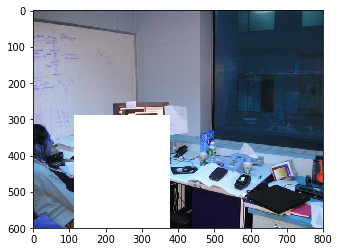

___________________________________
Made Missing Region in /root/data/VG_100K/9.jpg
Missing region(man) is located at x:582, y:270, width:144, height:118


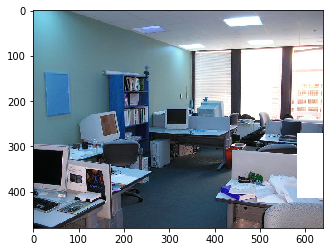

In [10]:
for image_idx in range(image_start_index, image_end_index+1):
    image_path = image_file_path + "{img_idx}.jpg".format(img_idx=image_idx)
    if os.path.isfile(image_path) is True:
        flag, dict = retrieve_annotation(image_idx, json_data, object_class)
        if flag is True:
            img = cv2.imread(image_path,cv2.IMREAD_COLOR)
            print("___________________________________")
            print("Made Missing Region in {image_path}".format(image_path=image_path))
            for key in dict.keys():
                object_inf = dict[key]
                img = cv2.rectangle(img, (object_inf['x'], object_inf['y']), (object_inf['x']+object_inf['w'], object_inf['y']+object_inf['h']), (255,255,255), -1)
                print("Missing region({obj}) is located at x:%d, y:%d, width:%d, height:%d".format(obj=key) % (object_inf['x'], object_inf['y'], object_inf['h'], object_inf['w']))
            total_save_image_name = save_path+"{img_idx}_removed.jpg".format(img_idx=image_idx)
            cv2.imwrite(total_save_image_name, img)
            plt.imshow(img)
            plt.show()
        else: pass
    else: pass